In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

raw_train = train.copy()
raw_test = test.copy()

train.shape, test.shape

((891, 12), (418, 11))

In [6]:
all_list = [train, test]
all_combine = pd.concat([train,test],ignore_index=True)
all_combine.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
for data in all_list:
    data.drop('PassengerId',axis=1,inplace=True)

In [10]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

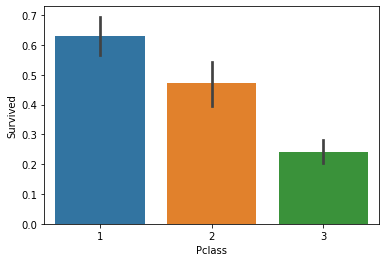

In [14]:
sns.barplot(data=train,x='Pclass',y='Survived')

In [15]:
train.groupby('Pclass')[['Fare']].mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [16]:
for data in all_list:
    data['Title'] = data['Name'].str.extract(' ([a-zA-Z]+)\.')

In [17]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Ms            1
Capt          1
Countess      1
Jonkheer      1
Don           1
Lady          1
Mme           1
Sir           1
Name: Title, dtype: int64

In [19]:
rare_titles = []
for data in all_list:
    title_dict = dict( data['Title'].value_counts() )
    for title, count in title_dict.items():
        if count < 10:
            rare_titles.append(title)

In [20]:
rare_titles

['Dr',
 'Rev',
 'Mlle',
 'Col',
 'Major',
 'Ms',
 'Capt',
 'Countess',
 'Jonkheer',
 'Don',
 'Lady',
 'Mme',
 'Sir',
 'Rev',
 'Col',
 'Dona',
 'Ms',
 'Dr']

In [21]:
for data in all_list:
    data['Title'] = data['Title'].replace(rare_titles,'Rare')

In [22]:
train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

In [23]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rare        7
Name: Title, dtype: int64

In [24]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [25]:
for data in all_list:
    data.drop('Name',axis=1,inplace=True)

In [26]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

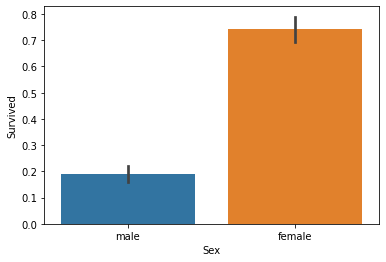

In [27]:
sns.barplot(data=train,x='Sex',y='Survived')

In [28]:
for data in all_list:
    data['FamilySize'] = data['SibSp'] + data['Parch']

In [29]:
for data in all_list:
    data['Alone'] = 0
    data.loc[ data['FamilySize'] == 0 ,'Alone'] = 1

In [30]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Alone
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1


In [31]:
for data in all_list:
    data.drop(['SibSp','Parch'],axis=1,inplace=True)

In [32]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Alone
0,0,3,male,22.0,A/5 21171,7.2500,NaN,S,Mr,1,0
1,1,1,female,38.0,PC 17599,71.2833,C85,C,Mrs,1,0
2,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1
3,1,1,female,35.0,113803,53.1000,C123,S,Mrs,1,0
4,0,3,male,35.0,373450,8.0500,NaN,S,Mr,0,1


In [33]:
train['Ticket'].value_counts()

1601           7
347082         7
CA. 2343       7
3101295        6
347088         6
              ..
347062         1
SC/AH 29037    1
A4. 54510      1
19972          1
113028         1
Name: Ticket, Length: 681, dtype: int64

In [34]:
test['Ticket'].value_counts()

PC 17608              5
CA. 2343              4
113503                4
SOTON/O.Q. 3101315    3
347077                3
                     ..
349911                1
347065                1
C.A. 42795            1
SC/A4 23568           1
367226                1
Name: Ticket, Length: 363, dtype: int64

In [35]:
for data in all_list:
    data.drop('Ticket',axis=1,inplace=True)

In [36]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,Alone
0,0,3,male,22.0,7.2500,NaN,S,Mr,1,0
1,1,1,female,38.0,71.2833,C85,C,Mrs,1,0
2,1,3,female,26.0,7.9250,NaN,S,Miss,0,1
3,1,1,female,35.0,53.1000,C123,S,Mrs,1,0
4,0,3,male,35.0,8.0500,NaN,S,Mr,0,1


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

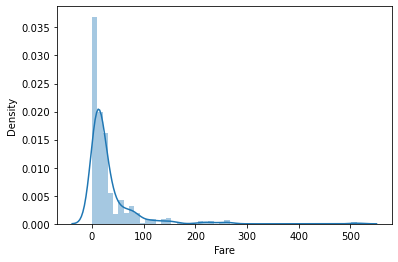

In [37]:
sns.distplot(train['Fare'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

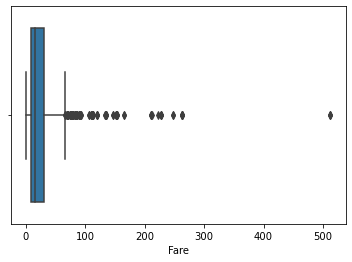

In [38]:
sns.boxplot(train['Fare'])

In [39]:
train.drop( train[train['Fare'] > 500].index, inplace=True)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

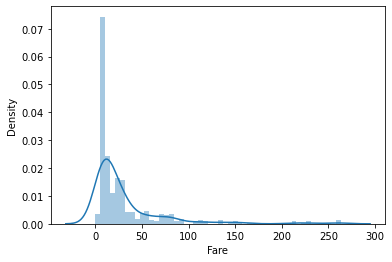

In [40]:
sns.distplot(train['Fare'])

In [41]:
test[ test['Fare'].isnull()]

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,Alone
152,3,male,60.5,NaN,NaN,S,Mr,0,1


In [42]:
for data in all_list:
    data.drop('FamilySize',axis=1,inplace=True)

In [43]:
train.groupby('Alone')[['Fare']].mean().sort_values(by='Fare',ascending=False)

,Fare
Alone,
0,47.519253
1,19.406851


In [44]:
pred_fare = train[ (train['Pclass']==3) & (train['Sex']=='male') & (train['Embarked']=='S') & (train['Alone']==1)]['Fare'].mean()

In [45]:
test['Fare'].fillna(pred_fare,inplace=True)

In [46]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,0,3,male,22.0,7.2500,NaN,S,Mr,0
1,1,1,female,38.0,71.2833,C85,C,Mrs,0
2,1,3,female,26.0,7.9250,NaN,S,Miss,1
3,1,1,female,35.0,53.1000,C123,S,Mrs,0
4,0,3,male,35.0,8.0500,NaN,S,Mr,1


In [47]:
train['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
E101           3
D              3
              ..
E46            1
B80            1
B3             1
B94            1
C118           1
Name: Cabin, Length: 146, dtype: int64

In [48]:
for data in all_list:
    data.loc[ data['Cabin'].notnull() ,'Cabin'] = [ cabin[0] for cabin in data[data['Cabin'].notnull()]['Cabin'] ]

In [49]:
train['Cabin'].value_counts()

C    59
B    45
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [50]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,0,3,male,22.0,7.2500,NaN,S,Mr,0
1,1,1,female,38.0,71.2833,C,C,Mrs,0
2,1,3,female,26.0,7.9250,NaN,S,Miss,1
3,1,1,female,35.0,53.1000,C,S,Mrs,0
4,0,3,male,35.0,8.0500,NaN,S,Mr,1


In [51]:
train.groupby('Cabin')[['Fare']].mean().sort_values(by='Fare')

,Fare
Cabin,
G,13.581250
F,18.696792
T,35.500000
A,39.623887
E,46.026694
D,57.244576
B,95.780278
C,100.151341


In [52]:
def Cabin_Prediction(fare):
    if fare <= 13.58:
        return 'G'
    if fare <= 18.69:
        return 'F'
    if fare <= 35.50:
        return 'T'
    if fare <= 39.62:
        return 'A'
    if fare <= 46.02:
        return 'E'
    if fare <= 57.24:
        return 'D'
    if fare <= 95.78:
        return 'B'
    else:
        return 'C'    

In [53]:
for data in all_list:
    data.loc[ data['Cabin'].isnull(),'Cabin'] = data.loc[ data['Cabin'].isnull() ,'Fare'].map(Cabin_Prediction)

In [54]:
train.isnull().sum() , test.isnull().sum()

(Survived      0
 Pclass        0
 Sex           0
 Age         177
 Fare          0
 Cabin         0
 Embarked      2
 Title         0
 Alone         0
 dtype: int64,
 Pclass       0
 Sex          0
 Age         86
 Fare         0
 Cabin        0
 Embarked     0
 Title        0
 Alone        0
 dtype: int64)

In [55]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,0,3,male,22.0,7.2500,G,S,Mr,0
1,1,1,female,38.0,71.2833,C,C,Mrs,0
2,1,3,female,26.0,7.9250,G,S,Miss,1
3,1,1,female,35.0,53.1000,C,S,Mrs,0
4,0,3,male,35.0,8.0500,G,S,Mr,1


In [56]:
train[ train['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
61,1,1,female,38.0,80.0,B,NaN,Miss,1
829,1,1,female,62.0,80.0,B,NaN,Mrs,1


<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

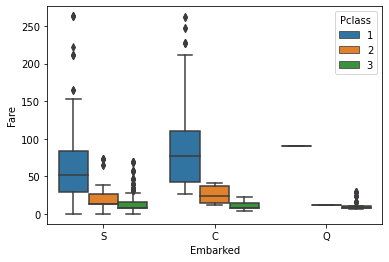

In [57]:
sns.boxplot(data=train,x='Embarked',y='Fare',hue='Pclass')

In [58]:
train['Embarked'].fillna('C',inplace=True)

In [59]:
train.isnull().sum(), test.isnull().sum()

(Survived      0
 Pclass        0
 Sex           0
 Age         177
 Fare          0
 Cabin         0
 Embarked      0
 Title         0
 Alone         0
 dtype: int64,
 Pclass       0
 Sex          0
 Age         86
 Fare         0
 Cabin        0
 Embarked     0
 Title        0
 Alone        0
 dtype: int64)

In [60]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,0,3,male,22.0,7.2500,G,S,Mr,0
1,1,1,female,38.0,71.2833,C,C,Mrs,0
2,1,3,female,26.0,7.9250,G,S,Miss,1
3,1,1,female,35.0,53.1000,C,S,Mrs,0
4,0,3,male,35.0,8.0500,G,S,Mr,1


<AxesSubplot:xlabel='Alone', ylabel='Age'>

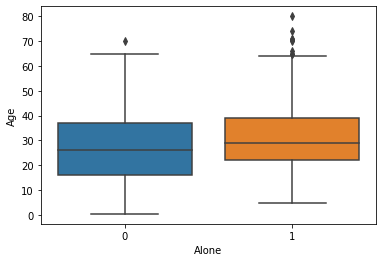

In [61]:
sns.boxplot(data=train,x='Alone',y='Age')

In [62]:
def Age_Prediction(pclass,cabin,embarked,alone):
    age_pred = train[ (train['Pclass'] == pclass) & (train['Cabin'] == cabin) & 
                     (train['Embarked'] == embarked) & (train['Alone'] == alone)]['Age'].mean()
    if np.isnan(age_pred):
        return train['Age'].mean()
    else:
        return age_pred

In [63]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,0,3,male,22.0,7.2500,G,S,Mr,0
1,1,1,female,38.0,71.2833,C,C,Mrs,0
2,1,3,female,26.0,7.9250,G,S,Miss,1
3,1,1,female,35.0,53.1000,C,S,Mrs,0
4,0,3,male,35.0,8.0500,G,S,Mr,1


In [64]:
for data in all_list:
    data.loc[ data['Age'].isnull() ,'Age'] = data[ data['Age'].isnull()].apply(lambda row: Age_Prediction(row['Pclass'],row['Cabin'],row['Embarked'],row['Alone']) ,axis=1)

In [65]:
train.isnull().sum(), test.isnull().sum()

(Survived    0
 Pclass      0
 Sex         0
 Age         0
 Fare        0
 Cabin       0
 Embarked    0
 Title       0
 Alone       0
 dtype: int64,
 Pclass      0
 Sex         0
 Age         0
 Fare        0
 Cabin       0
 Embarked    0
 Title       0
 Alone       0
 dtype: int64)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

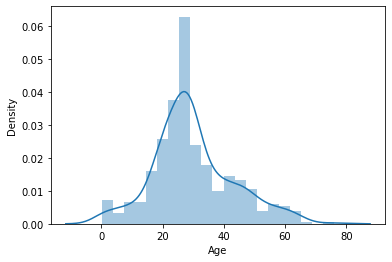

In [66]:
sns.distplot(data['Age'])

In [67]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,0,3,male,22.0,7.2500,G,S,Mr,0
1,1,1,female,38.0,71.2833,C,C,Mrs,0
2,1,3,female,26.0,7.9250,G,S,Miss,1
3,1,1,female,35.0,53.1000,C,S,Mrs,0
4,0,3,male,35.0,8.0500,G,S,Mr,1


In [68]:
train['AgeBand'] = pd.cut(train['Age'],5)
train['FareBand'] = pd.qcut(train['Fare'],5)

In [69]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone,AgeBand,FareBand
0,0,3,male,22.0,7.2500,G,S,Mr,0,"(16.336, 32.252]","(-0.001, 7.854]"
1,1,1,female,38.0,71.2833,C,C,Mrs,0,"(32.252, 48.168]","(39.688, 263.0]"
2,1,3,female,26.0,7.9250,G,S,Miss,1,"(16.336, 32.252]","(7.854, 10.5]"
3,1,1,female,35.0,53.1000,C,S,Mrs,0,"(32.252, 48.168]","(39.688, 263.0]"
4,0,3,male,35.0,8.0500,G,S,Mr,1,"(32.252, 48.168]","(7.854, 10.5]"


In [70]:
train.groupby('AgeBand')[['Survived']].mean()

,Survived
AgeBand,
"(0.34, 16.336]",0.556604
"(16.336, 32.252]",0.333333
"(32.252, 48.168]",0.402715
"(48.168, 64.084]",0.424658
"(64.084, 80.0]",0.090909


In [71]:
train.groupby('FareBand')[['Survived']].mean()

,Survived
FareBand,
"(-0.001, 7.854]",0.217877
"(7.854, 10.5]",0.201087
"(10.5, 21.075]",0.426901
"(21.075, 39.688]",0.441989
"(39.688, 263.0]",0.635838


In [72]:
def Age_to_Category(age):
    if age <= 16:
        return 1
    if age <= 32:
        return 2
    if age <= 48:
        return 3
    if age <= 64:
        return 4
    else:
        return 5
    
def Fare_to_Category(fare):
    if fare <= 7.85:
        return 1
    if fare <= 10.5:
        return 2
    if fare <= 21.07:
        return 3
    if fare <= 39.68:
        return 4
    else:
        return 5

In [73]:
for data in all_list:
    data['Age'] = data['Age'].map( Age_to_Category )
    data['Fare'] = data['Fare'].map( Fare_to_Category)

In [74]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone,AgeBand,FareBand
0,0,3,male,2,1,G,S,Mr,0,"(16.336, 32.252]","(-0.001, 7.854]"
1,1,1,female,3,5,C,C,Mrs,0,"(32.252, 48.168]","(39.688, 263.0]"
2,1,3,female,2,2,G,S,Miss,1,"(16.336, 32.252]","(7.854, 10.5]"
3,1,1,female,3,5,C,S,Mrs,0,"(32.252, 48.168]","(39.688, 263.0]"
4,0,3,male,3,2,G,S,Mr,1,"(32.252, 48.168]","(7.854, 10.5]"


In [75]:
train.drop(['AgeBand','FareBand'],axis=1,inplace=True)

In [76]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,0,3,male,2,1,G,S,Mr,0
1,1,1,female,3,5,C,C,Mrs,0
2,1,3,female,2,2,G,S,Miss,1
3,1,1,female,3,5,C,S,Mrs,0
4,0,3,male,3,2,G,S,Mr,1


In [77]:
train['Title'].value_counts(), test['Title'].value_counts()

(Mr        515
 Miss      181
 Mrs       125
 Master     40
 Rare       27
 Name: Title, dtype: int64,
 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Rare        7
 Name: Title, dtype: int64)

In [78]:
for data in all_list:
    data['Sex'] = data['Sex'].map({'male':1,'female':2})
    data['Cabin'] = data['Cabin'].map({'G':1,'T':2,'F':3,'C':4,'B':5,'D':6,'E':7,'A':8})
    data['Embarked'] = data['Embarked'].map({'S':1,'C':2,'Q':3})
    data['Title'] = data['Title'].map({'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5})

In [79]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,0,3,1,2,1,1,1,1,0
1,1,1,2,3,5,4,2,3,0
2,1,3,2,2,2,1,1,2,1
3,1,1,2,3,5,4,1,3,0
4,0,3,1,3,2,1,1,1,1


<AxesSubplot:>

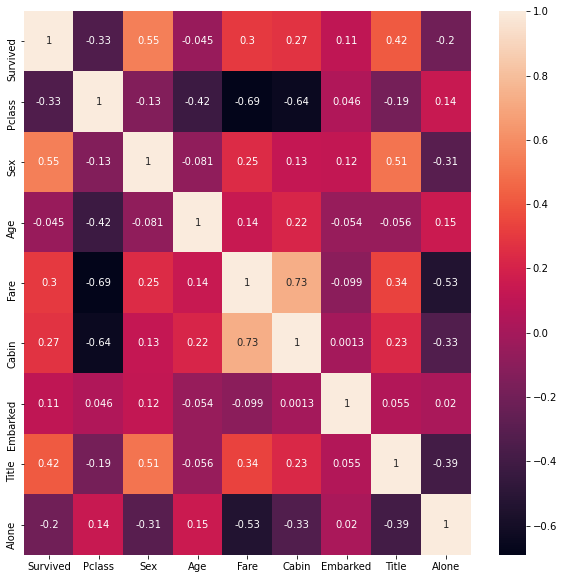

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

In [81]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

models = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

result = pd.DataFrame(columns=['Model','Accuracy'])

sss = StratifiedShuffleSplit(n_splits=10,random_state=42)

x = train.iloc[:,1:]
y = train.iloc[:,0]

score_dict = {}

for train_idx, test_idx in sss.split(x,y):
    x_train, x_test = x.iloc[train_idx] , x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx] , y.iloc[test_idx]
    
    for model in models:
        name = model.__class__.__name__
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        score = accuracy_score(y_test,y_pred)
        if name in score_dict:
            score_dict[name] += score
        else:
            score_dict[name] = score

In [91]:
x

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,3,1,2,1,1,1,1,0
1,1,2,3,5,4,2,3,0
2,3,2,2,2,1,1,2,1
3,1,2,3,5,4,1,3,0
4,3,1,3,2,1,1,1,1
...,...,...,...,...,...,...,...,...
886,2,1,2,3,1,1,5,1
887,1,2,2,4,5,1,2,1
888,3,2,2,4,2,1,2,0
889,1,1,2,4,4,2,1,1


In [82]:
score_dict

{'KNeighborsClassifier': 7.97752808988764,
 'SVC': 8.258426966292134,
 'DecisionTreeClassifier': 7.966292134831461,
 'RandomForestClassifier': 8.056179775280897,
 'AdaBoostClassifier': 8.067415730337078,
 'GradientBoostingClassifier': 8.146067415730338,
 'GaussianNB': 7.51685393258427,
 'LinearDiscriminantAnalysis': 7.865168539325843,
 'QuadraticDiscriminantAnalysis': 8.07865168539326,
 'LogisticRegression': 7.98876404494382}

In [83]:
for name in score_dict:
    score_dict[name] /= 10
    result = result.append( pd.DataFrame( [[name,score_dict[name]]] ,columns=result.columns) )

In [84]:
result

,Model,Accuracy
0,KNeighborsClassifier,0.797753
0,SVC,0.825843
0,DecisionTreeClassifier,0.796629
0,RandomForestClassifier,0.805618
0,AdaBoostClassifier,0.806742
0,GradientBoostingClassifier,0.814607
0,GaussianNB,0.751685
0,LinearDiscriminantAnalysis,0.786517
0,QuadraticDiscriminantAnalysis,0.807865
0,LogisticRegression,0.798876


<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

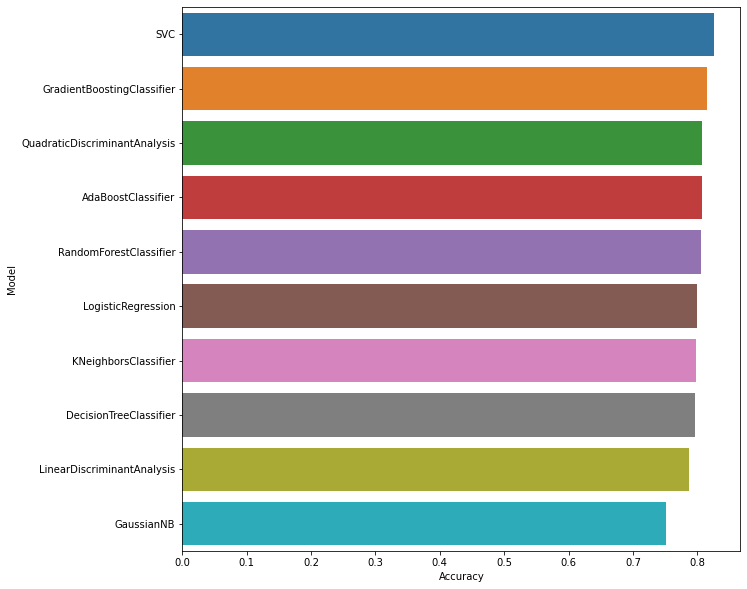

In [85]:
plt.figure(figsize=(10,10))
result = result.sort_values(by='Accuracy',ascending=False)
sns.barplot(data=result,x='Accuracy',y='Model')

In [86]:
test

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,3,1,3,1,1,3,1,1
1,3,2,3,1,1,1,3,0
2,2,1,4,2,1,3,1,1
3,3,1,2,2,1,1,1,1
4,3,2,2,3,1,1,3,0
...,...,...,...,...,...,...,...,...
413,3,1,2,2,1,1,1,1
414,1,2,3,5,4,2,5,1
415,3,1,3,1,1,1,1,1
416,3,1,2,2,1,1,1,1


In [87]:
best_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
best_model.fit(x,y)
y_pred = best_model.predict(test)
my_submission2 = pd.DataFrame({'PassengerId':raw_test['PassengerId'],
                              'Survived':y_pred})

In [88]:
my_submission2.to_csv('sub_Mine2_RandomForest.csv',index=False)